# Part 1: Comparing decision trees with other models

**Advantages of decision trees:**
    
- Can be used for regression or classification
- Can be displayed graphically
- Highly interpretable
- Can be specified as a series of rules, and more closely approximate human decision-making than other models
- Prediction is fast
- Features don't need scaling
- Automatically learns feature interactions
- Tends to ignore irrelevant features
- Non-parametric (will outperform linear models if relationship between features and response is highly non-linear)
- Robust to the outliers
- Impact of Missing values is Minimal

<h4> <center> Below is the example of DT implementation on Classification Problem statement using the advistrisement dataset

In [3]:
# Decision Tree Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # data related functionalities are coming from this

# dtreeviz and graphviz | libraries to visualize the Dtree being created


#### Importing the dataset

In [5]:
# Step 1 : Importing the dataset
dataset = pd.read_csv('Advertisements.csv')
#dataset.shape
dataset.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


#### You have to have the prper >> irrespective of Ankur Doing that or not in this case
##### Understanding - EDA
#### Cleaning 
#### Preparing the data

In [10]:
# EDA ofcourse to the extent it is possible
#___________________________________________________

#dataset.head(2)
#dataset.info()   # str() function in R
#dataset.columns    # names() in R
#dataset.shape       # dim() in R
dataset.describe()   # summary() in R


# Homework
# 'pandas_profiling' # this is very interesting Package for you to get in and out of everything from the data.


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [5]:
# Spliting the overall data into X and Y [this is what required in ML]

X = dataset.iloc[:, [2, 3]].values # because indexing in Python starts from 0 to n-1 | 
                                      # puling age and Esitmated Salary

y = dataset.iloc[:, 4].values # 'Purchased' as Y column

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1111)


In [7]:
print(X_train.shape)

(300, 2)


In [8]:
# * Feature Scaling | Scaling the variables | standardizign the variable | 
# Z - score | Mean = 0 and STD = 1
# To get all the variables on same scale [towards ZERO]

#Ex: Salary[123000000] and Age[22] are two columns which have vary much distant values

#___________________________________________________________________________

# In the DT, though it is not required but mandatory in KNN (classification) KMEANS (clustering) because : 
                                               # these algorithms are distance based algorithm

# still a good read !!

#_______________________________________________________________________________________________________________________
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


X_train = sc.fit_transform(X_train) # you are finding the MEan and STD{with the fit()
#                                    }on training data and aslo transforming that

X_test = sc.transform(X_test)       # Only tranforming now


In [10]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier?

In [2]:
from sklearn.tree import DecisionTreeClassifier

#DecisionTreeClassifier?

# classifier = DecisionTreeClassifier(random_state = 0) # without palying with any of the arugment's value: 

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0) # > this will have Gini Index
                                          
    
# all the arugments are as of now : running with the default / standard value
# In case if you think that you know in and out of Decision methodology: 
     # the mahtematics behind that and the way it works behind the curtains
    
# if you think you are RajniKant/ JAmes Bond for this Techniqie - 
# then welcome to the party to play around the values of the arguments ?
# now what ideally should be the values of those argumetns is either some one tells you ? of you identify

# HEnce for that purpose only - Hyper Parameter tuning is done

In [11]:
# sklearn - is the prime package for all the typicall ML based algorithms
#_______________________________________________________________________
# Fitting Decision Tree Classification to the Training set

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state = 0) # > this will have Gini Index

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) #  this will have Entropy Index

classifier.fit(X_train, y_train) # to train the model with X_train and y_train
classifier
# _________________________________________________________________________________________________________________
# Rerun the model again: with the below arugments and the optimised value - Hyperparameter | gridsearch
# {'max_depth': 2, 'min_samples_leaf': 40, 'min_samples_split': 20}


# classifier = DecisionTreeClassifier(criterion = 'entropy', 
                                            # random_state = 0, max_depth= 2, 
                                            # 'min_samples_leaf': 40, 
                                            #     'min_samples_split': 20) 


DecisionTreeClassifier(random_state=0)

#### Which of the two is better  [ Gini / Entropy ]?
- 1. Generally speaking, either deliver fairly similar outcomes and Gini,
owing to less computational rigour gets favoured
- 2. However, Entropy(reduction)/Information Gain seems to be preferred if
the predicted variable is skewed (e.g. default in loans)
- 3. Entropy also tends to be more effective when the number of features are
large
- 4. Gini Score is used in CART while Entropy/Information Gain is used in
ID3 and C4.5
- 5. In sum, Entropy appears to be a better method to use as it can deal with
skewed dependent variables and also when one needs to go beyond
binary classification problems

In [12]:
# Predicting the Test set results
# This Prredict function : it to Apply the MODEL 

y_pred = classifier.predict(X_test) # this is "Test Y predicted"  

In [13]:
y_pred # predictied Y Test values of 0 or 1

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [14]:
y_test # actual Y test Set of 0 or 1

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm
#______________________________________________________________________________________________
# accuracy_score | Accuracy you are gettinng below is 84 %
#______________________________________________________________________________________________
# auc_ROC  = over the test data ?

array([[58, 10],
       [ 5, 27]], dtype=int64)

In [24]:
from sklearn import metrics

print(dir(metrics))

['SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'base', 'brier_score_loss', 'calinski_harabaz_score', 'classification', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'mutual_info_score', 'normalized_mutual_info_score', 'pairwise', 'pairwise_distances', 'pairwise_distance

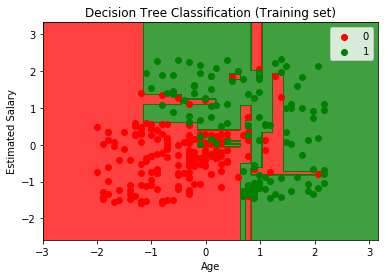

In [14]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


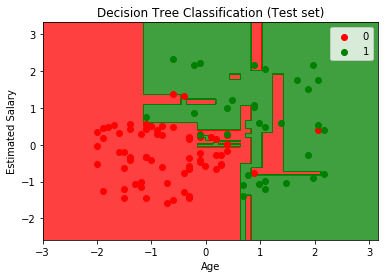

In [15]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Disadvantages of decision trees:**
    
- Performance is (generally) not competitive with the best supervised learning methods
    - Use Ensembles 
- Can easily overfit the training data (tuning is required / PRUNING standard concept we talked about)

- Small variations in the data can result in a completely different tree (high variance)
    - Use Ensembles to reduce the variance
    
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree
- Doesn't tend to work well if the classes are highly unbalanced
- Doesn't tend to work well with very small datasets

In [ ]:
#### Finetune the performance of the model | hyperparameter optimization

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
pGrid = {'max_depth': range(2, 10), # 8
        'min_samples_leaf': range(10, 51, 10),  # 5
        'min_samples_split': range(20, 81, 20)}   # 4

gscv_dt = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = pGrid, cv = 5,
                       scoring = 'accuracy', n_jobs = -1, verbose = True)

In [25]:
gscv_dt.fit(X, y)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   34.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 10), 'min_samples_leaf': range(10, 51, 10), 'min_samples_split': range(20, 81, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=True)

In [26]:
gscv_dt.best_params_

{'max_depth': 2, 'min_samples_leaf': 40, 'min_samples_split': 20}

In [22]:
param_grid = {'max_depth': np.arange(2, 15), 
                 'max_features': np.arange(2, 4)}


tree = GridSearchCV(DecisionTreeClassifier(random_state = 1), param_grid, cv = 5, scoring = 'roc_auc')

tree.fit(train_X, train_y)


NameError: name 'GridSearchCV' is not defined

In [ ]:
# Task : get the classification done on wine dataset which is preloaded and also come across with the 
# visuals of DT being created


# PS : to build a DT classifier model to predict if a sample is 
# picked a wine and corresponding ingredeints [ 13 ingredeints are there] from which winyeard [ 0 or 1 or 2 ? ] 
# this sample is coming
#___________________________________________________________________________________
# Wanna know more ? Please read Github

In [18]:
from sklearn.datasets import load_wine

wine = load_wine()

In [22]:
X = wine.data
y = wine.target

In [24]:
y # 3 wineyards are there 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])